In [ ]:
import pandas as pd
import numpy as np

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

data = pd.read_csv("https://raw.githubusercontent.com/VishnuBDev/BOB/main/ISEAR.csv")
data=data.dropna(axis=1) #to remove NaN column
data.head()


,Emotion,Text
0,joy,On days when I feel close to my partner and ot...
1,fear,Every time I imagine that someone I love or I ...
2,anger,When I had been obviously unjustly treated and...
3,sadness,When I think about the short time that we live...
4,disgust,At a gathering I found myself involuntarily si...


In [ ]:
data['Emotion'].value_counts()

joy        1092
sadness    1082
anger      1079
fear       1076
shame      1071
disgust    1066
guilt      1050
Name: Emotion, dtype: int64

In [ ]:
x=data['Emotion']
y=data['Text']

table=pd.DataFrame({'emotions':x,'tweets':y})
table



,emotions,tweets
0,joy,On days when I feel close to my partner and ot...
1,fear,Every time I imagine that someone I love or I ...
2,anger,When I had been obviously unjustly treated and...
3,sadness,When I think about the short time that we live...
4,disgust,At a gathering I found myself involuntarily si...
...,...,...
7511,shame,Two years back someone invited me to be the tu...
7512,shame,I had taken the responsibility to do something...
7513,fear,I was at home and I heard a loud sound of spit...
7514,guilt,I did not do the homework that the teacher had...


In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
table['neg'] = table['tweets'].apply(lambda x:analyzer.polarity_scores(x)['neg'])
table['pos'] = table['tweets'].apply(lambda x:analyzer.polarity_scores(x)['pos'])
table['neu'] = table['tweets'].apply(lambda x:analyzer.polarity_scores(x)['neu'])
table['comp'] = table['tweets'].apply(lambda x:analyzer.polarity_scores(x)['compound'])
table

,emotions,tweets,neg,pos,neu,comp
0,joy,On days when I feel close to my partner and ot...,0.000,0.209,0.791,0.7650
1,fear,Every time I imagine that someone I love or I ...,0.374,0.199,0.427,-0.4019
2,anger,When I had been obviously unjustly treated and...,0.155,0.000,0.845,-0.2960
3,sadness,When I think about the short time that we live...,0.000,0.000,1.000,0.0000
4,disgust,At a gathering I found myself involuntarily si...,0.117,0.000,0.883,-0.3384
...,...,...,...,...,...,...
7511,shame,Two years back someone invited me to be the tu...,0.071,0.000,0.929,-0.7618
7512,shame,I had taken the responsibility to do something...,0.163,0.069,0.768,-0.7269
7513,fear,I was at home and I heard a loud sound of spit...,0.000,0.000,1.000,0.0000
7514,guilt,I did not do the homework that the teacher had...,0.000,0.000,1.000,0.0000


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


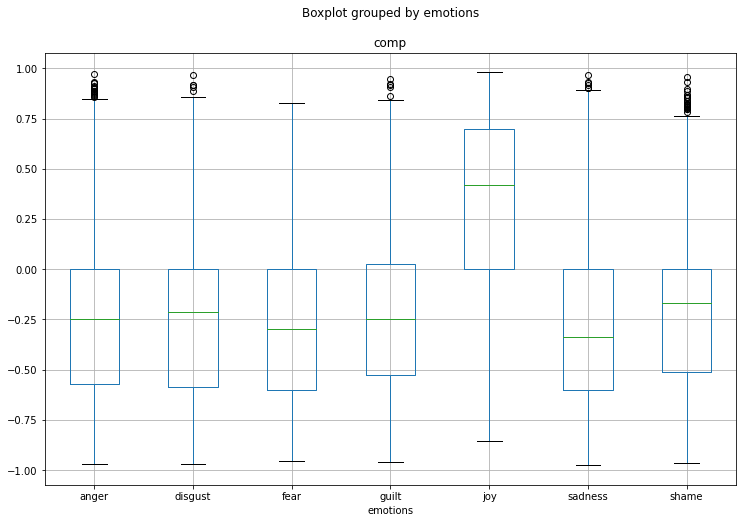

In [ ]:
table.boxplot(by='emotions', column='comp', figsize=(12,8))